# Benchmarking circuits for Qiskit

![Qiskit logo](img/qiskit-heading.png)

This work provides a collection of quantum circuits that can be used to benchmark Qiskit, to keep track of the impact of the changes on its performance as codebase evolves or simply assert it at a given point in time.

The quantum circuits provided both span useful building blocks for larger quantum circuits, as well as application-related circuits. A few examples of the currently available ones are:

- random circuits
- QFT
- n-Toffoli gate
- variational circuits for quantum chemistry (UCCSD)

Users can compute various metrics on these `QuantumCircuit` objects by accesing for example their width, depth, gate count, or runtime on either a simulator or QPU, before or after optimizations are performed. These metrics can then be used to assert the performance of various modules of Qiskit, or the feasibility of an approach on a backend with limited capabilities such as memory or coherence time.

These circuits have parameters, so that one can observe how the desired metrics scale with input size.

This list can be expanded to various other types of circuits such as adders, Grover for a random oracle, magic state factory, quantum error-correcting code and many others.

## General-purpose quantum circuits

These circuits are building blocks that are used in a wide array or larger circuits. They are formulated at the highest-level of abstraction.

In [ ]:
from circuit_benchmarks.toffoli import toffoli
print(toffoli(4))

In [36]:
from networkx import grid_2d_graph, hexagonal_lattice_graph, triangular_lattice_graph, to_edgelist, draw, kamada_kawai_layout, convert_node_labels_to_integers

def square_grid_adj(n, m):
    nxgraph = grid_2d_graph(n, m)
    nodelist = list(nxgraph.nodes)
    return [[nodelist.index(n1),nodelist.index(n2)] for n1, n2, _ in to_edgelist(nxgraph)]
def hex_grid_adj(n, m):
    nxgraph = hexagonal_lattice_graph(n, m)
    nodelist = list(nxgraph.nodes)
    return [[nodelist.index(n1),nodelist.index(n2)] for n1, n2, _ in to_edgelist(nxgraph)]
def tri_grid_adj(n, m):
    nxgraph = triangular_lattice_graph(n, m)
    nodelist = list(nxgraph.nodes)
    return [[nodelist.index(n1),nodelist.index(n2)] for n1, n2, _ in to_edgelist(nxgraph)]

grid_graphs = [square_grid_adj(n,n) for n in range(2,22)]
hex_graphs = [hex_grid_adj(n,n) for n in range(2,22)]
tri_graphs = [tri_grid_adj(n,n) for n in range(2,22)]

In [40]:
from qiskit.mapper import CouplingMap

grid_couplm = [CouplingMap(l) for l in grid_graphs]
hex_couplm =  [CouplingMap(l) for l in hex_graphs]
tri_couplm =  [CouplingMap(l) for l in tri_graphs]

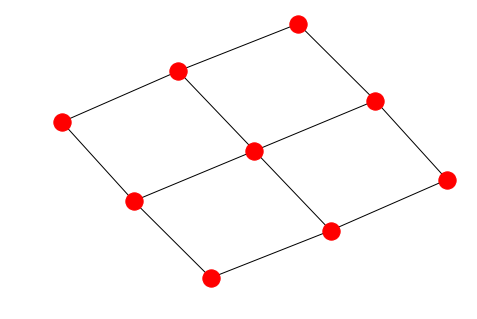

In [37]:
g = grid_2d_graph(3,3)
pos = kamada_kawai_layout(g)
draw(g, pos)

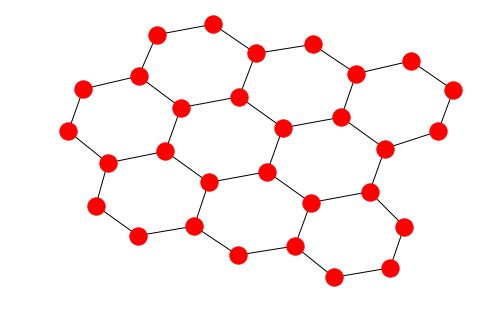

In [13]:
g = hexagonal_lattice_graph(3,3)
pos = kamada_kawai_layout(g)
draw(g, pos)

## Application-specific quantum circuits

These circuits directly provide a way for users to benchmark the performance of Qiskit over particular applications of interest, and evaluate the feasibility of an approach on a target hardware, for example (runtime, hardware constraints on quantum volume...).

In [ ]:
# An example of UCCSD circuit for a given molecular system and basis, printed?

### Varitonal circuits in quantum chemistry

Some of these circuits are tied to a given problem, defined for example by a molecule and a basis set. The number of qubits required by these circuits, as well as the number of parameters used for the variational search is then determined accordingly. That is, these circuits cannot be simply fully-defined by a number of qubits provided as input; this is the case of the UCCSD variational form, for example. However, one can still observe how different metrics scale for these circuits by varying problem size (e.g the molecule or basis set), which makes sense for users that are focused on concrete applications in the field.

In [ ]:
import numpy as np
from qiskit_chemistry.drivers import PySCFDriver, UnitsType
from UCCSD import UCCSD_qc

# A list of molecules to use in benchmarking (can be grown larger by Qiskit users)
H2 = 'H .0 .0 .0; H .0 .0 0.735'
LiH = 'Li .0 .0 .0; H .0 .0 1.6'
NaH = 'Na .0 .0 .0; H .0 .0 1.9'
molecules = [H2, LiH, NaH]

# A list of bases to use in benchmarking (can be grown larger by Qiskit users)
bases = ['sto3g', '631g', 'ccpVDZ']

In [ ]:
# How the resource required by a quantum circuit scale with molecule size, for a given basis
for m in molecules:
    print("Molecule ---- ")
    qc = UCCSD_qc((m, 'sto3g', UnitsType.ANGSTROM), active_occupied=[], active_unoccupied=[],
                   map_type='parity', two_qubit_reduction=False,
                   depth=1)
    print(qc.width(), qc.depth(), qc.size())
    print(qc.count_ops())

In [ ]:
# How the resource required by a quantum circuit scale with basis size, for a given molecule
for b in bases:
    print("Quantum circuit for H2 in ", b, " basis")
    qc = UCCSD_qc((H2, b, UnitsType.ANGSTROM), active_occupied=[], active_unoccupied=[],
                   map_type='parity', two_qubit_reduction=False,
                   depth=1)
    print(qc.width(), qc.depth(), qc.size())
    print(qc.count_ops())

The code provides functions allowing to generate these UCCSD circuits for various molecules, basis sets and active spaces. The benchmark can be enriched by users, inputing their own problem and adding the corresponding circuit to the benchmark.

This approach can be generalized easily to different ansatz, or active spaces, allowing the user to determine what is the best approach to running for example VQE. They could then identiify the feasible approaches on the target hardware, and the parameters yielding the most appealing performance-accuracy trade-off.

# Magic State Factory

In [ ]:
from circuit_benchmarks.distillation_protocols import reed_muller_15

In [ ]:
f = reed_muller_15().draw(output='mpl')

In [ ]:
f